<a href="https://colab.research.google.com/github/microprediction/timeseries-notebooks/blob/main/divinity_hello.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install divinity
import logging, sys
logging.disable(sys.maxsize)

In [ ]:
!pip install microprediction

### Hello world example
See https://www.microprediction.com/blog/popular-timeseries-packages for more packages

In [15]:
from microprediction import MicroReader
mr = MicroReader()
YS = mr.get_lagged_values(name='emojitracker-twitter-face_with_medical_mask.json')[:50]

In [16]:
import divinity as dv
import pandas as pd 
import datetime 
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

def run(ys):
  """ Slow, see river package or others if you don't like """
  burnin = 100

  def next_value(ys):
      dfc = dv.divinity(forecast_length=1)
      dfc.fit(np.array(ys))
      y_hat = dfc.predict()[0]
      return y_hat

  y_hats = list()
  for t in range(len(ys)):
      if t > burnin:
          y_hat = next_value(ys[:t])
      elif t >= 1:
          y_hat = ys[t - 1]
      else:
          y_hat = 0
      y_hats.append(y_hat)
  return y_hats
XS = run(YS)

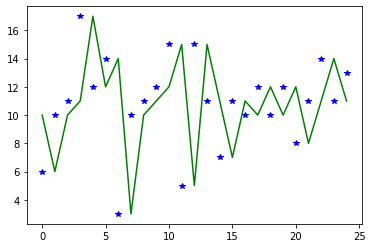

In [17]:
import matplotlib.pyplot as plt
plt.plot(YS[25:],'*b')
plt.plot(XS[25:],'g')